# Statystyczne metody przetwarzania danych 

## Laboratorium 2 - algorytm Najbliższego Sąsiada (NN)


### Opis
Celem jest zbadanie danych i opracowanie algorytmu klasyfikacji liści. Do tego celu należy zaimplementować i zastosować klasyfikator najbliższego sąsiada - NN (Nearest Neighbor).

Ukończony projekt powinien:
* Klasyfikować dwie klasy liści:
    * `Populus nigra` - klasa nr 3, 
    * `Quercus robur` - klasa nr 5.

### Zbiór danych

Zbiór danych znajduje się w `dataset/leaf.npz`. Jest to zbiór danych pobrany i zmodyfikowany z adresu: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE I NAZWISKO].zip
    +-- 📜 Lab01.ipynb
    +-- 📂 dataset
        +-- 📜 leaf.npz
        +-- 📜 ReadMe.pdf
```

### Zadanie 1

Wczytaj dane z pliku `dataset.npz`. Plik ten zawiera zbiór danych podzielony na dwa podzbiory: treningowy `train` i testowy `test`. Każdy z nich zawiera cechy oraz indeksy klas. Dokładny opis zbioru danych znajduje się w pliku `ReadMe.pdf`.

> Podpowiedź: Możesz wykorzystać poniższy kod:
```python
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
```

In [12]:
import numpy as np
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

### Zadanie 2

Sprawdź: 
* ile jest wszystkich próbek z zbiorze, 
* ile jest próbek w poszczegónych klasach.

Czy zauważyłeś jakieś problemy związane z tym zbiorem danych?

In [13]:


print("Train: ",train.shape)
print("Test: ",test.shape)


for i in range(40):
    print("Ilość próbek klasy ",i+1,": ",len(train[train[:,0] == i+1]))

Train:  (2244, 16)
Test:  (1496, 16)
Ilość próbek klasy  1 :  77
Ilość próbek klasy  2 :  66
Ilość próbek klasy  3 :  55
Ilość próbek klasy  4 :  66
Ilość próbek klasy  5 :  77
Ilość próbek klasy  6 :  44
Ilość próbek klasy  7 :  44
Ilość próbek klasy  8 :  33
Ilość próbek klasy  9 :  121
Ilość próbek klasy  10 :  88
Ilość próbek klasy  11 :  88
Ilość próbek klasy  12 :  77
Ilość próbek klasy  13 :  99
Ilość próbek klasy  14 :  66
Ilość próbek klasy  15 :  66
Ilość próbek klasy  16 :  0
Ilość próbek klasy  17 :  0
Ilość próbek klasy  18 :  0
Ilość próbek klasy  19 :  0
Ilość próbek klasy  20 :  0
Ilość próbek klasy  21 :  0
Ilość próbek klasy  22 :  121
Ilość próbek klasy  23 :  77
Ilość próbek klasy  24 :  77
Ilość próbek klasy  25 :  66
Ilość próbek klasy  26 :  99
Ilość próbek klasy  27 :  55
Ilość próbek klasy  28 :  66
Ilość próbek klasy  29 :  110
Ilość próbek klasy  30 :  77
Ilość próbek klasy  31 :  77
Ilość próbek klasy  32 :  66
Ilość próbek klasy  33 :  66
Ilość próbek klasy

In [14]:
"""
Liczba klas: 40 (z pliku readme)

niektóre klasy nie posiadajają próbek testowych, dodatkowo klasy nie są równe, posiadają różne ilości przykładów
Zbiór treningowy jest stosunkowo mały w porównaniu do testowego, zwykle stosujemy 80% prbek jako trenigowe i 20% jako testowe

"""

'\nLiczba klas: 40 (z pliku readme)\n\nniektóre klasy nie posiadajają próbek testowych, dodatkowo klasy nie są równe, posiadają różne ilości przykładów\nZbiór treningowy jest stosunkowo mały w porównaniu do testowego, zwykle stosujemy 80% prbek jako trenigowe i 20% jako testowe\n\n'

### Zadanie 3

Wybierz wiersze należące do poniższych klas (rodzaje liści) i zapisz w zmiennych `train_new` oraz `test_new`:
* `Populus nigra` - klasa nr 3, 
* `Quercus robur` - klasa nr 5.

Aby wybrać jedynie te wiersze, które należą do wymienionych klas, należy przefiltrować dane po kolumnie o indeksie `0`:


In [15]:
# <UZUPEŁNIJ>
train_new = np.vstack((train[train[:,0] == 3],train[train[:,0] == 5]))
test_new = test[(test[:,0] == 3) | (test[:,0] == 5)]

### Zadanie 4

A) Wybierz dwie dowolne cechy (*features*), np. o indeksach 4 i 8.<br />
B) Przedstaw graficznie próbki - na osi X i Y wartości wybranych cech.

Poniższy kod importuje kolekcję funkcji przydatnych do wizualizacji z biblioteki `matplotlib` (*info: zwróć uwagę, że nadano alias `plt`*).
```python
import matplotlib.pyplot as plt
```

Możesz wykorzystać funkcje `plt.figure`, `plt.scatter`, `plt.legend`, `plt.title`, `plt.xlabel` i `plt.ylabel` w celu wykonania tego zadania.

Scatter: <https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html>

>Ważne: Pamiętaj, że każdy przedstawiony wykres powinien być czytelny i posiadać następujące elementy:
* tytuł,
* opisy wszystkich osi,
* legendę.

> **Przykład**:
```python
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.title("Próbki")
plt.xlabel(f"Cecha 1")
plt.ylabel(f"Cecha 2")
samples = np.random.rand(2, 20, 2)
samples[0] = samples[0]-0.5
samples[1] = samples[1]+0.5
for idx, sample in enumerate(samples):
    plt.scatter(x=sample[:, 0], y=sample[:, 1], label=idx)
plt.legend()
```
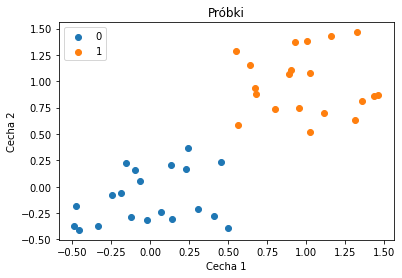

Dodatkowe zasoby:
* `pyplot`: <https://matplotlib.org/tutorials/introductory/pyplot.html>

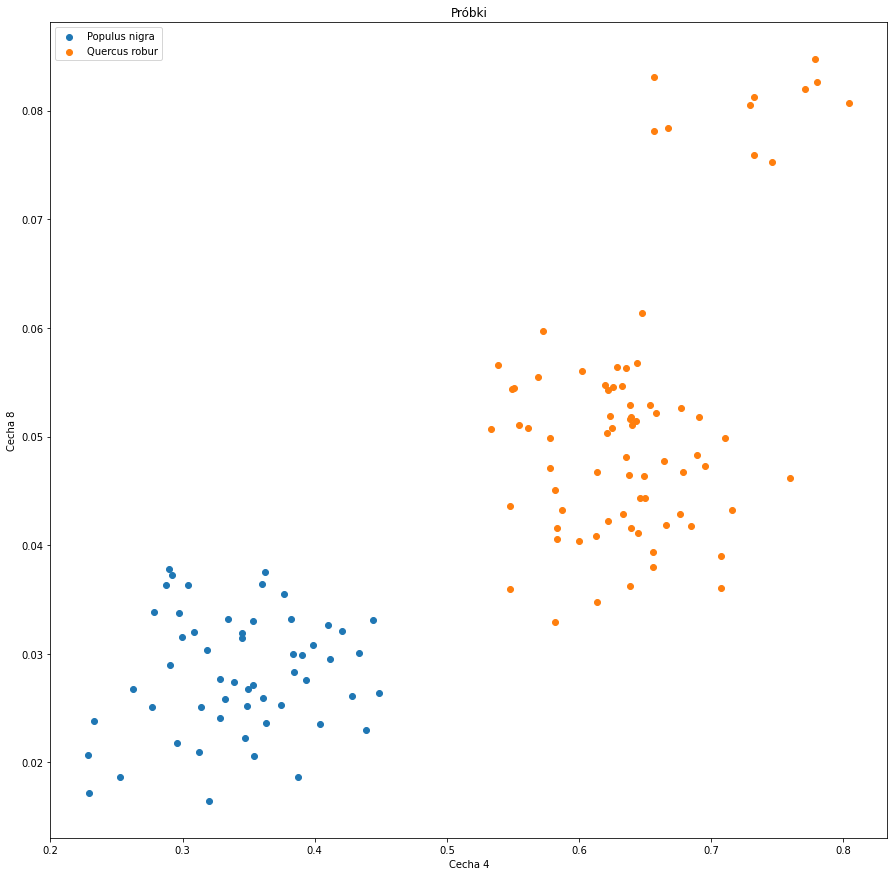

In [16]:
import matplotlib.pyplot as plt
plt.figure()
plt.title("Próbki")
plt.xlabel(f"Cecha 4")
plt.ylabel(f"Cecha 8")

'''plt.scatter(x=train_new[train_new[:,0] == 3][:,4], y=train_new[train_new[:,0] == 3][:,8], label="Klasa 3")
plt.scatter(x=train_new[train_new[:,0] == 5][:,4], y=train_new[train_new[:,0] == 5][:,8], label="Klasa 5")
'''
clesses = [3,5]
feature = [4,8]

nazwy = {3: 'Populus nigra', 5: 'Quercus robur'}

for cl in clesses:
    plt.scatter(x=train_new[train_new[:,0] == cl][:,feature[0]], y=train_new[train_new[:,0] == cl][:,feature[1]], label=nazwy[cl])

plt.legend()

### Zadanie 5

Zaimplementuj funkcję `edist`, która zwróci _odległość Euklidesa_ pomiędzy punktem `p1` oraz `p2` uwzględniający wybrane cechy `features`.

$$
d(x, y) = \sqrt{\sum^{n-1}_{i=0}{(x_i - y_i)^2}}
$$

In [17]:
# <UZUPEŁNIJ PONIZEJ>
features = [1, 2] # kolumny o indeksach 1, 2
p1 = [0, 2, 3] #16
p2 = [0, 5, 6] # 16

def edist(p1, p2, features):
    a=[]
    b=[]
    for i in features:
        a.append(p1[i])
        b.append(p2[i])
        
    c=0
    
    for i in range(len(features)):
        c += (a[i]-b[i])**2
    
    return c**(1/2) 

edist(p1, p2, features) # 4.242640687119285

4.242640687119285

### Zadanie 6

Zaimplementuj klasyfikator najbliższego sąsiada. 
1. Oblicz odległość każdego elementu ze zbioru _testowego_ do każdego elementu ze zbioru _treningowego_. 
2. Odnajdź taki element ze zbioru _treningowego_, którego odległość do klasyfikowanego elementu (ze zbioru _testowego_) jest najmniejsza.
3. Przypisz klasyfikowanemu elementowi klasę.


In [20]:
def nN(train, test, features):
    classified = np.copy(test)
    nearest = 100
    for te in range(len(test)):
        nearest = 100
        for tr in range (len(train)):
            distance = edist(test[te], train[tr], features)
            if distance < nearest:
                nearest = distance
                classified[te,0] = train[tr,0]
            
    return classified

In [22]:
# wybór klas
def choose_classes(classes):
    for i in range(len(classes)):
        if i == 0:
            c_train = np.array(train[train[:,0] == classes[i]])
            c_test = np.array(test[test[:,0] == classes[i]])
        else:
            c_train = np.vstack((c_train,train[train[:,0] == classes[i]]))
            c_test = np.vstack((c_test,test[test[:,0] == classes[i]]))
    return c_train, c_test

### Zadanie 7
Wyświetl wyniki klasyfikacji (próbki treningowe i testowe), każdą klasę w innym kolorze, a próbki testowe innym "markerem".

> Wykorzystaj parametry: `facecolors`, `edgecolors`, `marker` i `c` funkcji `scatter`.

In [26]:
classes = [3,5]
features = [4,8]   
new_train, new_test = choose_classes(classes)
classified48 = nN(new_train,new_test,features)

(110, 16)

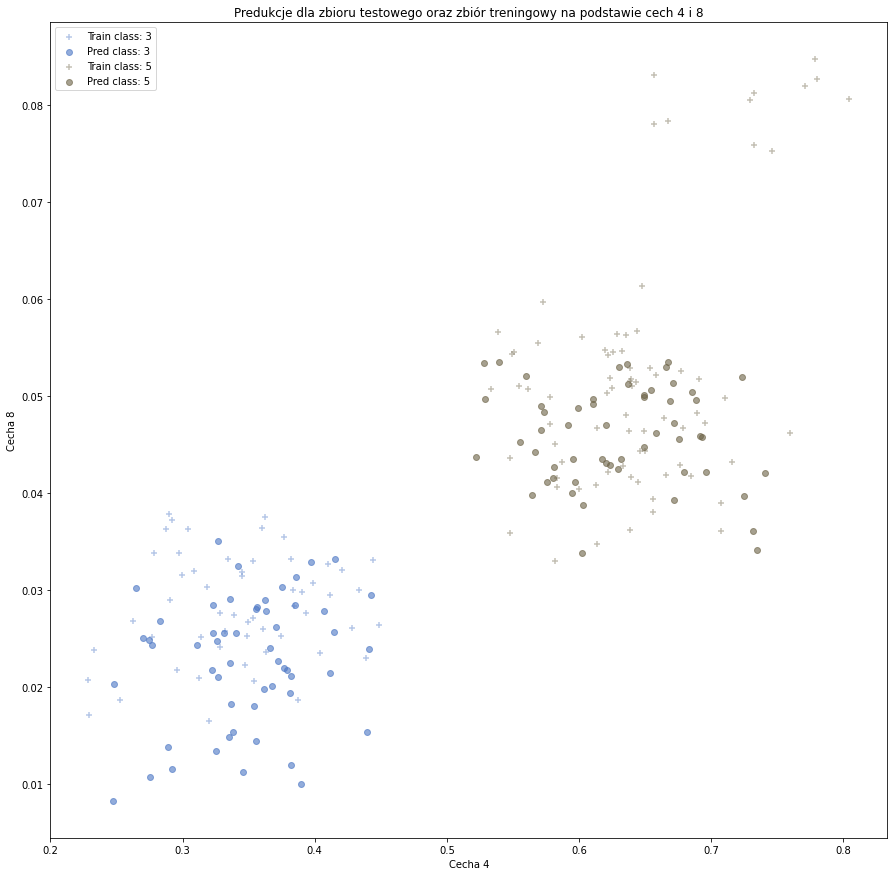

In [29]:
import random
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
color = []
for i in range(41):
    color.append((random.randint(0,100)/100,random.randint(0,100)/100,random.randint(0,100)/100))
    


nazwy = {3: 'Populus nigra', 5: 'Quercus robur'} 
    

plt.rcParams["figure.figsize"] = (15,15)

plt.title("Predukcje dla zbioru testowego oraz zbiór treningowy na podstawie cech 4 i 8")
plt.xlabel(f"Cecha 4")
plt.ylabel(f"Cecha 8")


for cl in classes:
    plt.scatter(x=new_train[new_train[:,0] == cl][:,feature[0]],
                y=new_train[new_train[:,0] == cl][:,feature[1]],
                label='Train class: '+str(cl),
                marker ='+',
                c = color[cl],
                alpha=0.4)
    
    plt.scatter(x=classified48[classified48[:,0] == cl][:,feature[0]],
                y=classified48[classified48[:,0] == cl][:,feature[1]],
                label='Pred class: '+str(cl),
                c = color[cl],
                alpha=0.6)
    
    
plt.legend()


### Zadanie 8

Oblicz dokładność (*Accuracy*) klasyfikacji (stosunek poprawnie zaklasyfikowanych próbek do liczby wszystkich próbek wyrażony procentowo).

$$
\texttt{Accuracy} = \frac{T}{N}
$$

gdzie $T$ - liczba poprawnie zaklasyfikowanych próbek, $N$ - liczba wszystkich próbek.


In [39]:
# <UZUPEŁNIJ>
def acc(classified,test):
    correct = (test[:,0] == classified[:,0])
    correct = np.count_nonzero(correct)
    return correct/len(classified)

print(f'Accuracy dla klasyfikacji na podstawie cech 4 i 8: {acc(classified48, new_test): .1%}')


Accuracy dla klasyfikacji na podstawie cech 4 i 8:  100.0%


### Zadanie 9

Wybierz 5 dowolnych rodzajów liści (klasy) i przeprowadź eksperyment ponownie.

> Możesz połączyć wszystkie powyższe fragmenty doku w wkleić w komórkę poniżej zmieniając liczbę klas.

Accuracy dla klasyfikacji na podstawie cech 4 i 8 dla 5 klas:  93.9%


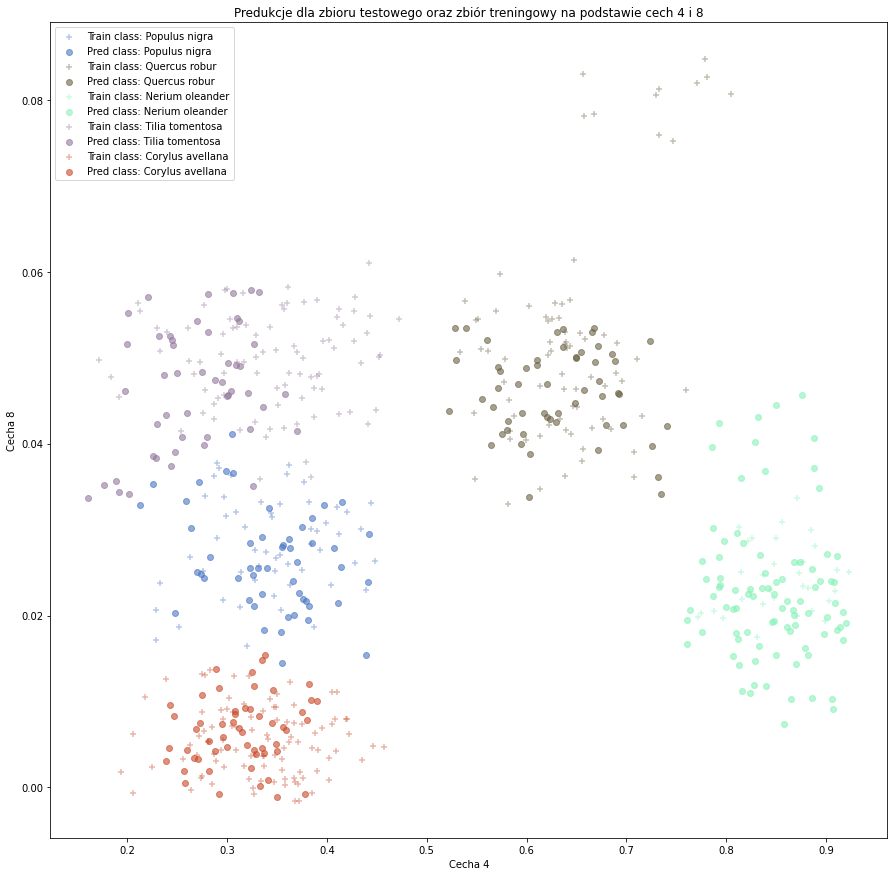

In [42]:
features = [4,8]
classes = [3,5,8,10,13]

new_train, new_test = choose_classes(classes)
classified = nN(new_train,new_test,features)

nazwy = {3: 'Populus nigra',
         5: 'Quercus robur',
         8: 'Nerium oleander',
         10:'Tilia tomentosa',
         13:'Corylus avellana'} 

plt.rcParams["figure.figsize"] = (15,15)

plt.title("Predukcje dla zbioru testowego oraz zbiór treningowy na podstawie cech 4 i 8")
plt.xlabel(f"Cecha 4")
plt.ylabel(f"Cecha 8")


for cl in classes:
    plt.scatter(x=new_train[new_train[:,0] == cl][:,feature[0]],
                y=new_train[new_train[:,0] == cl][:,feature[1]],
                label='Train class: '+nazwy[cl],
                marker ='+',
                c = color[cl],
                alpha=0.4)
    
    plt.scatter(x=classified[classified[:,0] == cl][:,feature[0]],
                y=classified[classified[:,0] == cl][:,feature[1]],
                label='Pred class: '+nazwy[cl],
                c = color[cl],
                alpha=0.6)
    
    
plt.legend()

print(f'Accuracy dla klasyfikacji na podstawie cech 4 i 8 dla 5 klas: {acc(classified, new_test): .1%}')

### Zadanie 10

Przeprowadź eksperyment ponownie dla większej liczby cech.

In [44]:
# <UZUPEŁNIJ>
pairs = [[4,5,6,7,8],
         [10,11,12,13],
         [4,8],
         [4,3,5]]

classes = [3,5,8,10,13]

for i in range(len(pairs)):    
    features = pairs[i]
    new_train, new_test = choose_classes(classes)
    classified = nN(new_train,new_test,features)
                
    print(f'Accuracy dla klasyfikacji 5 klas na podstawie cech {pairs[i]}: {acc(classified, new_test): .1%}')

Accuracy dla klasyfikacji 5 klas na podstawie cech [4, 5, 6, 7, 8]:  82.5%
Accuracy dla klasyfikacji 5 klas na podstawie cech [10, 11, 12, 13]:  45.8%
Accuracy dla klasyfikacji 5 klas na podstawie cech [4, 8]:  93.9%
Accuracy dla klasyfikacji 5 klas na podstawie cech [4, 3, 5]:  68.7%


### Zadanie 11

Napisz wnioski z przeprowadzonego eksperymentu.

- Dobór odpowiednich cech na podstawie których dokonujemy klasyfikacji pozwala uzyskać nam lepsze lub gorsze wynik klasyfikacji
- Zwiększenie liczby cech nie zawsze ma pozytywny wpływ na wynik kwalifikacji dla cehc [10, 11, 12, 13] klasyfikacja dała gorszy wynik niż dla cech [4,8]
